In [1]:
import numpy as np

class Perceptron:
    
    def __init__(self, n_iterations=1000, learning_rate=0.0001):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
    
    # calculate the prediction for a single sample
    def single_prediction(self, x):
        response = np.dot(self.weights.T, x) + self.bias
        return 1 if response > 0 else 0
    
    # fit the algorithm
    def fit(self, X, Y):
        # initiate the weights and the bias
        self.weights = np.ones(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iterations):
            for x, y in zip(X,Y):
                    prediction = self.single_prediction(x)
                    # update the weights and bias at each iteration
                    self.weights += self.learning_rate * (y - prediction) * x
                    self.bias += self.learning_rate * (y - prediction)
    
    # make predictions based on the fit 
    def predict(self, X):
        y_pred = []
        for x in X:
            prediction = self.single_prediction(x)
            y_pred.append(prediction)
        return np.array(y_pred)

Now, we can test the class on generated isotropic Gaussian blobs for clustering with `make_blobs`

In [2]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=100, centers=2, random_state=3)

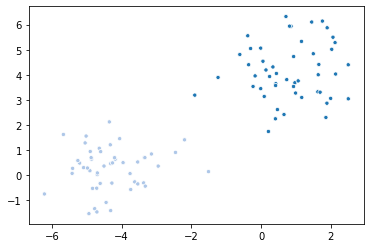

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_blob[:,0], y=X_blob[:,1], hue=y_blob, size=5, legend=False, palette='tab20')
plt.show()

Fit the class on the dataset and test for prediction accuracy

In [12]:
p_clf = Perceptron(n_iterations=100)
p_clf.fit(X_blob, y_blob)
y_pred = p_clf.predict(X_blob)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_blob, y_pred)

1.0

We can equally look at the decision boundary used to separate the two clusters

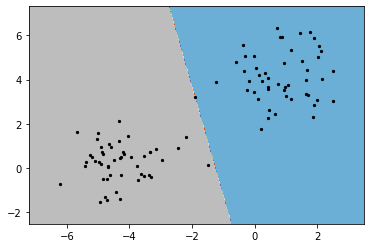

In [14]:
h = .02 # mesh step size

# create a mesh to plot in
x_min, x_max = X_blob[:, 0].min() - 1, X_blob[:, 0].max() + 1
y_min, y_max = X_blob[:, 1].min() - 1, X_blob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# plot the decision boundary by assigning a color to each
# point in the mesh
Z = p_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="tab20c")

# also plot the training points
plt.scatter(X_blob[:, 0], X_blob[:, 1], color = 'k', s=5)
plt.show()

The decision boundary can equally be obtained by calculating the slope and the intercept given the weights and the bias

In [16]:
slope = (-(p_clf.bias/p_clf.weights[1]) / (p_clf.bias/p_clf.weights[0]))
intercept =(-(p_clf.bias/p_clf.weights[1]))

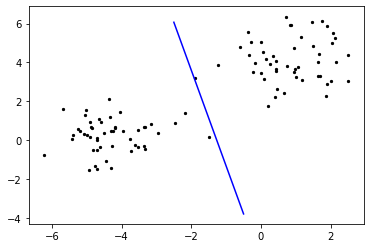

In [21]:
x = np.array([-0.5, -2.5])
y = slope*x + intercept

plt.plot(x, y, c='b')
plt.scatter(X_blob[:, 0], X_blob[:, 1], color = 'k', s=5)
plt.show()